<p><font size="6"><b> CASE - air quality data of European monitoring stations (AirBase)</b></font></p>

Adapted version from:
> *© 2021, Joris Van den Bossche and Stijn Van Hoey  (<mailto:jorisvandenbossche@gmail.com>, <mailto:stijnvanhoey@gmail.com>). Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We processed some raw data files of the AirBase air quality data. The data contains hourly concentrations of nitrogen dioxide (NO2) for 4 different measurement stations:

- FR04037 (PARIS 13eme): urban background site at Square de Choisy
- FR04012 (Paris, Place Victor Basch): urban traffic site at Rue d'Alesia
- BETR802: urban traffic site in Antwerp, Belgium
- BETN029: rural background site in Houtem, Belgium

See http://www.eea.europa.eu/themes/air/interactive/no2

# Importing and quick exploration

We processed the individual data files in the previous notebook ([case4_air_quality_processing.ipynb](case4_air_quality_processing.ipynb)), and saved it to a csv file `airbase_data_processed.csv`. Let's import the file here (if you didn't finish the previous notebook, a set of the pre-processed dataset if also available in `data/airbase_data.csv`):

In [2]:
alldata = pd.read_csv('data/airbase_data.csv', index_col=0, parse_dates=True)

We only use the data from 1999 onwards:

In [3]:
data = alldata['1999':].copy()

Some first exploration with the *typical* functions:

In [4]:
data.head() # tail()

,BETR801,BETN029,FR04037,FR04012
datetime,,,,
1999-01-01 00:00:00,27.0,13.0,68.0,105.0
1999-01-01 01:00:00,33.0,15.0,70.0,116.0
1999-01-01 02:00:00,24.0,16.0,72.0,114.0
1999-01-01 03:00:00,26.0,18.0,72.0,91.0
1999-01-01 04:00:00,NaN,19.0,74.0,81.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122736 entries, 1999-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   BETR801  106628 non-null  float64
 1   BETN029  111989 non-null  float64
 2   FR04037  120384 non-null  float64
 3   FR04012  119448 non-null  float64
dtypes: float64(4)
memory usage: 4.7 MB


In [6]:
data.describe(percentiles=[0.1, 0.5, 0.9])

,BETR801,BETN029,FR04037,FR04012
count,106628.000000,111989.00000,120384.000000,119448.000000
mean,46.728969,16.42093,40.040005,87.993261
std,21.708333,12.31968,23.024347,41.317684
min,1.000000,1.00000,0.000000,0.000000
10%,21.000000,4.00000,14.000000,37.000000
50%,45.000000,12.00000,37.000000,88.000000
90%,75.000000,34.00000,70.000000,139.000000
max,339.000000,105.00000,256.000000,358.000000


<AxesSubplot:xlabel='datetime'>

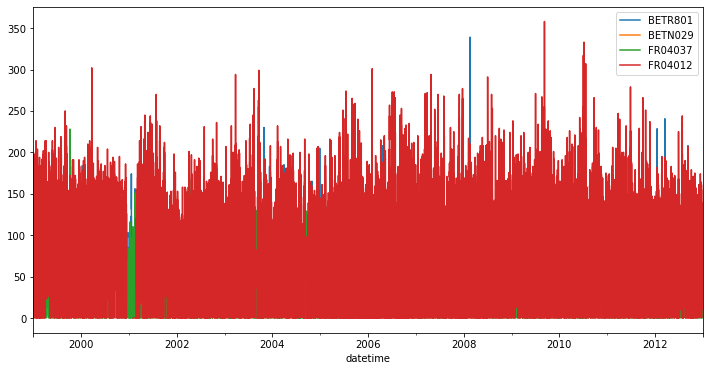

In [7]:
data.plot(figsize=(12,6))

<div class="alert alert-warning">

**ATTENTION!**:

When just using `.plot()` without further notice (selection, aggregation,...)

* Risk of running into troubles by overloading your computer processing (certainly with looooong time series).
* Not always the most informative/interpretable visualisation.

</div>

**Plot only a subset**

Why not just using the `head`/`tail` possibilities?

<AxesSubplot:xlabel='datetime'>

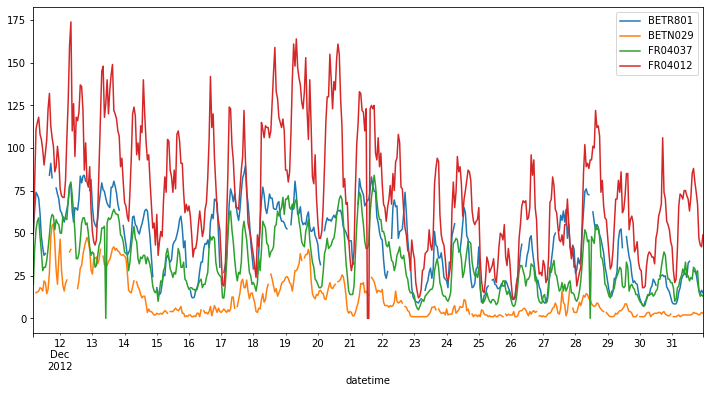

In [8]:
data.tail(500).plot(figsize=(12,6))

**Summary figures**

Use summary statistics...

<AxesSubplot:>

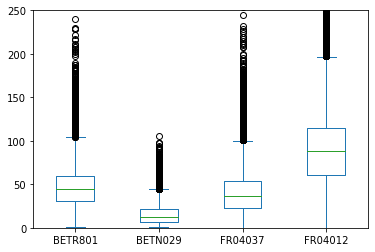

In [9]:
data.plot(kind='box', ylim=[0,250])

Also with seaborn plots function, just start with some subsets as first impression...

As we already have seen previously, the plotting library [seaborn](http://seaborn.pydata.org/generated/seaborn.heatmap.html) provides some high-level plotting functions on top of matplotlib (check the [docs](http://seaborn.pydata.org/examples/index.html)!). One of those functions is `pairplot`, which we can use here to quickly visualize the concentrations at the different stations and their relation:

In [10]:
import seaborn as sns

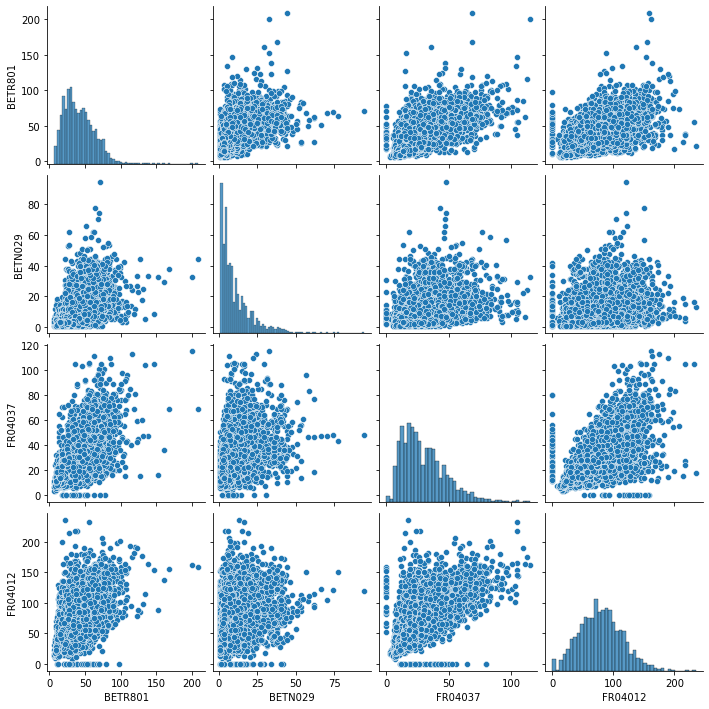

In [11]:
sns.pairplot(data.tail(5000).dropna())

# Is this a tidy dataset ?

In [12]:
data.head()

,BETR801,BETN029,FR04037,FR04012
datetime,,,,
1999-01-01 00:00:00,27.0,13.0,68.0,105.0
1999-01-01 01:00:00,33.0,15.0,70.0,116.0
1999-01-01 02:00:00,24.0,16.0,72.0,114.0
1999-01-01 03:00:00,26.0,18.0,72.0,91.0
1999-01-01 04:00:00,NaN,19.0,74.0,81.0


In principle this is not a tidy dataset. The variable that was measured is the NO2 concentration, and is divided in 4 columns. Of course those measurements were made at different stations, so one could interpret it as separate variables. But in any case, such format does not always work well with libraries like `seaborn` which expects a pure tidy format.


Reason to not use a tidy dataset here: 

* smaller memory use
* timeseries functionality like resample works better
* pandas plotting already does what we want when having different columns for *some* types of plots (eg line plots of the timeseries)

<div class="alert alert-success">

<b>EXERCISE 1</b>:

 <ul>
  <li>Create a tidy version of this dataset <code>data_tidy</code>, ensuring the result has new columns 'station' and 'no2'.</li>
  <li>Check how many missing values are contained in the 'no2' column.</li>
  <li>Drop the rows with missing values in that column.</li>
</ul>
</div>

In [14]:
%load _solutions/case4_air_quality_analysis1.py

In [15]:
%load _solutions/case4_air_quality_analysis2.py

In [16]:
%load _solutions/case4_air_quality_analysis3.py

In the following exercises we will mostly do our analysis on `data`and often use pandas plotting, but once we produced some kind of summary dataframe as the result of an analysis, then it becomes more interesting to convert that result to a tidy format to be able to use the more advanced plotting functionality of seaborn.

# Exercises

<div class="alert alert-warning">

<b>REMINDER</b>: <br><br>

Take a look at the [Timeseries notebook](pandas_04_time_series_data.ipynb) when you require more info about:

 <ul>
  <li><code>resample</code></li>
  <li>string indexing of DateTimeIndex</li>
</ul><br>

Take a look at the [matplotlib](visualization_01_matplotlib.ipynb) and [seaborn](visualization_02_seaborn.ipynb) notebooks when you require more info about the plot requirements.

</div>

<div class="alert alert-success">

<b>EXERCISE 2</b>:

 <ul>
  <li>Plot the monthly mean and median concentration of the 'FR04037' station for the years 2009 - 2013 in a single figure/ax</li>
</ul>
</div>

In [17]:
# %load _solutions/case4_air_quality_analysis4.py

In [18]:
# %load _solutions/case4_air_quality_analysis5.py

<div class="alert alert-success">

<b>EXERCISE 3</b>

 <ul>
  <li>Make a violin plot for January 2011 until August 2011 (check out the documentation to improve the plotting settings)</li>
  <li>Change the y-label to 'NO$_2$ concentration (µg/m³)'</li>
</ul><br>

_NOTE:_ In this case, we can use seaborn both with the data not in a long format but when having different columns for which you want to make violin plots, as with the tidy data.

</div>

In [19]:
# %load _solutions/case4_air_quality_analysis6.py

In [20]:
# %load _solutions/case4_air_quality_analysis7.py

In [21]:
# %load _solutions/case4_air_quality_analysis8.py

<div class="alert alert-success">

<b>EXERCISE 4</b>

 <ul>
  <li>Make a bar plot with pandas of the mean of each of the stations in the year 2012 (check the documentation of Pandas plot to adapt the rotation of the labels) and make sure all bars have the same color.</li>
  <li>Using the matplotlib objects, change the y-label to 'NO$_2$ concentration (µg/m³)</li>
  <li>Add a 'darkorange' horizontal line on the ax for the y-value 40 µg/m³ (command for horizontal line from matplotlib: <code>axhline</code>).</li>
  <li><a href="visualization_01_matplotlib.ipynb">Place the text</a> 'Yearly limit is 40 µg/m³' just above the 'darkorange' line.</li>
</ul>

</div>

In [22]:
# %load _solutions/case4_air_quality_analysis9.py

<div class="alert alert-success">

<b>EXERCISE 5:</b> Did the air quality improve over time?

 <ul>
  <li>For the data from 1999 till the end, plot the yearly averages</li>
  <li>For the same period, add the overall mean (all stations together) as an additional line to the graph, use a thicker black line (<code>linewidth=4</code> and <code>linestyle='--'</code>)</li>
  <li>[OPTIONAL] Add a legend above the ax for all lines</li>
  

</ul>
</div>

In [ ]:
# %load _solutions/case4_air_quality_analysis10.py

<div class="alert alert-info">

**REMEMBER**:

`resample` is a special version of a`groupby` operation. For example, taking annual means with `data.resample('A').mean()` is equivalent to `data.groupby(data.index.year).mean()` (but the result of `resample` still has a DatetimeIndex).

Checking the index of the resulting DataFrame when using **groupby** instead of resample: You'll notice that the Index lost the DateTime capabilities:

```python
>>> data.groupby(data.index.year).mean().index
```
<br>

Results in:

```
Int64Index([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012],
           dtype='int64')$
```
<br>

When using **resample**, we keep the DateTime capabilities:

```python
>>> data.resample('A').mean().index
```
<br>

Results in:

```
DatetimeIndex(['1999-12-31', '2000-12-31', '2001-12-31', '2002-12-31',
               '2003-12-31', '2004-12-31', '2005-12-31', '2006-12-31',
               '2007-12-31', '2008-12-31', '2009-12-31', '2010-12-31',
               '2011-12-31', '2012-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')
```
<br>

But, `groupby` is more flexible and can also do resamples that do not result in a new continuous time series, e.g. by grouping by the hour of the day to get the diurnal cycle.
</div>

<div class="alert alert-success">

<b>EXERCISE 6</b>

 <ul>
    <li>How does the <i>typical yearly profile</i> (typical averages for the different months over the years) look like for the different stations? (add a 'month' column as a first step)</li>

</ul>
</div>

In [ ]:
# %load _solutions/case4_air_quality_analysis11.py

Remove the temporary 'month' column generated in the solution of the previous exercise:

In [ ]:
data = data.drop("month", axis=1, errors="ignore")

Note: Technically, we could reshape the result of the groupby operation to a tidy format (we no longer have a real time series), but since we already have the things we want to plot as lines in different columns, doing `.plot` already does what we want.

<div class="alert alert-success">

<b>EXERCISE 7</b>

 <ul>
  <li>Plot the weekly 95% percentiles of the concentration in 'BETR801' and 'BETN029' for 2011</li>

</ul>
</div>

In [ ]:
# %load _solutions/case4_air_quality_analysis12.py

In [ ]:
# %load _solutions/case4_air_quality_analysis13.py

<div class="alert alert-success">

<b>EXERCISE 8</b>

 <ul>
  <li>Plot the typical diurnal profile (typical hourly averages) for the different stations taking into account the whole time period.</li>

</ul>
</div>

In [ ]:
# %load _solutions/case4_air_quality_analysis14.py

<div class="alert alert-success">

__EXERCISE 9__

What is the difference in the typical diurnal profile between week and weekend days? (and visualise it)

Start with only visualizing the different in diurnal profile for the 'BETR801' station. In a next step, make the same plot for each station.

<details><summary>Hints</summary>

- Add a column `weekend` defining if a value of the index is in the weekend (i.e. days of the week 5 and 6) or not
- Add a column `hour` with the hour of the day for each row.
- You can `groupby` on multiple items at the same time.
 
</details>

</div>

In [ ]:
# %load _solutions/case4_air_quality_analysis15.py

In [ ]:
# %load _solutions/case4_air_quality_analysis16.py

In [ ]:
# %load _solutions/case4_air_quality_analysis17.py

In [ ]:
# %load _solutions/case4_air_quality_analysis18.py

In [ ]:
# %load _solutions/case4_air_quality_analysis19.py

In [ ]:
# %load _solutions/case4_air_quality_analysis20.py

Remove the temporary columns 'hour' and 'weekend' used in the solution of previous exercise:

In [ ]:
data = data.drop(['hour', 'weekend'], axis=1, errors="ignore")

<div class="alert alert-success">

__EXERCISE 10__

Calculate the correlation between the different stations (check in the documentation, google "pandas correlation" or use the magic function <code>%psearch</code>)

</div>

In [ ]:
# %load _solutions/case4_air_quality_analysis21.py

<div class="alert alert-success">

__EXERCISE 11__

Count the number of exceedances of hourly values above the European limit 200 µg/m3 for each year and station after 2005. Make a barplot of the counts. Add an horizontal line indicating the maximum number of exceedances (which is 18) allowed per year?

**Hints:**

<details><summary>Hints</summary>
 
- Create a new DataFrame, called <code>exceedances</code>, (with boolean values) indicating if the threshold is exceeded or not
- Remember that the sum of True values can be used to count elements
- Adding a horizontal line can be done with the matplotlib function <code>ax.axhline</code>
 
</details>

</div>

In [ ]:
# %load _solutions/case4_air_quality_analysis22.py

In [ ]:
# %load _solutions/case4_air_quality_analysis23.py

In [ ]:
# %load _solutions/case4_air_quality_analysis24.py

# More advanced exercises...

In [ ]:
data = alldata['1999':].copy()

<div class="alert alert-success">

__EXERCISE 12__
    
Perform the following actions for the station `'FR04012'` only:

 <ul>
  <li>Remove the rows containing <code>NaN</code> or zero values</li>
  <li>Sort the values  of the rows according to the air quality values (low to high values)</li>
  <li>Rescale the values to the range [0-1] and store result as <code>FR_scaled</code> (Hint: check <a href="https://en.wikipedia.org/wiki/Feature_scaling#Rescaling">wikipedia</a>)</li>
  <li>Use pandas to plot these values sorted, not taking into account the dates</li>
  <li>Add the station name 'FR04012' as y-label</li>
  <li>[OPTIONAL] Add a vertical line to the plot where the line (hence, the values of variable FR_scaled) reach the value <code>0.3</code>. You will need the documentation of <code>np.searchsorted</code> and matplotlib's <code>axvline</code></li>
</ul>
</div>

In [ ]:
# %load _solutions/case4_air_quality_analysis25.py

In [ ]:
# %load _solutions/case4_air_quality_analysis26.py

In [ ]:
# %load _solutions/case4_air_quality_analysis27.py

<div class="alert alert-success">

<b>EXERCISE 13</b>:

 <ul>
  <li>Create a Figure with two subplots (axes), for which both ax<b>i</b>s are shared</li>
  <li>In the left subplot, plot the histogram (30 bins) of station 'BETN029', only for the year 2009</li>
  <li>In the right subplot, plot the histogram (30 bins) of station 'BETR801', only for the year 2009</li>
  <li>Add the title representing the station name on each of the subplots, you do not want to have a legend</li>
</ul>
</div>

In [ ]:
# %load _solutions/case4_air_quality_analysis28.py

In [ ]:
# %load _solutions/case4_air_quality_analysis29.py

<div class="alert alert-success">

<b>EXERCISE 14</b>

 <ul>
  <li>Make a selection of the original dataset of the data in January 2009, call the resulting variable <code>subset</code></li>
  <li>Add a new column, called 'dayofweek', to the variable <code>subset</code> which defines for each data point the day of the week</li>
  <li>From the <code>subset</code> DataFrame, select only Monday (= day 0) and Sunday (=day 6) and remove the others (so, keep this as variable <code>subset</code>)</li>
  <li>Change the values of the dayofweek column in <code>subset</code> according to the following mapping: <code>{0:"Monday", 6:"Sunday"}</code></li>
  <li>With seaborn, make a scatter plot of the measurements at 'BETN029' vs 'FR04037', with the color variation based on the weekday. Add a linear regression to this plot.</li>
</ul><br>

**Note**: If you run into the **SettingWithCopyWarning** and do not know what to do, recheck [pandas_03b_indexing](pandas_03b_indexing.ipynb)

</div>

In [ ]:
# %load _solutions/case4_air_quality_analysis30.py

In [ ]:
# %load _solutions/case4_air_quality_analysis31.py

In [ ]:
# %load _solutions/case4_air_quality_analysis32.py

In [ ]:
# %load _solutions/case4_air_quality_analysis33.py

<div class="alert alert-success">

__EXERCISE 15__

The maximum daily, 8 hour mean, should be below 100 µg/m³. What is the number of exceedances of this limit for each year/station?
  
<details><summary>Hints</summary>
 
- Have a look at the `rolling` method to perform moving window operations.

</details>

<br>_Note:_
This is not an actual limit for NO$_2$, but a nice exercise to introduce the `rolling` method. Other pollutans, such as 0$_3$ have actually such kind of limit values based on 8-hour means.

</div>

In [ ]:
# %load _solutions/case4_air_quality_analysis34.py

In [ ]:
# %load _solutions/case4_air_quality_analysis35.py

<div class="alert alert-success">

<b>EXERCISE 16</b>:

 <ul>
  <li>Visualize the typical week profile for station 'BETR801' as boxplots (where the values in one boxplot are the <i>daily means</i> for the different <i>weeks</i> for a certain day of the week).</li><br>
  </ul>
 

**Tip:**<br>

The boxplot method of a DataFrame expects the data for the different boxes in different columns. For this, you can either use `pivot_table` or a combination of `groupby` and `unstack`


</div>

Calculating daily means and add day of the week information:

In [ ]:
# %load _solutions/case4_air_quality_analysis36.py

In [ ]:
# %load _solutions/case4_air_quality_analysis37.py

Plotting with seaborn:

In [ ]:
# %load _solutions/case4_air_quality_analysis38.py

Reshaping and plotting with pandas:

In [ ]:
# %load _solutions/case4_air_quality_analysis39.py

In [ ]:
# %load _solutions/case4_air_quality_analysis40.py